<h1 align="center">  Exploratory Analysis With Linear Regression on Insurance.csv </h1>  
<h6 align="right" > Med Amine LAHYANI </h6>
</br>


In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Exploratory analysis with linear regressions

## Tasks and Feature Requirements

- Loading the data you receive into a Pandas DataFrame.
- Displaying the first five rows of the dataset.
- Displaying the description and information of the dataset.
- Using a regression model, we divide the data into training and testing portions.
- Adjusted training split to regression model.
- Displaying the score of your regression model.

### Loading data into a Pandas DataFrame. Showing the first five rows of the dataset.

In [3]:
insurance = pd.read_csv("insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### Display of the description of the data set.

In [5]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### <h1> I. Simple linear regression model

### Using a simple linear regression model, we divide the data into training and testing portions.

In [7]:
x = insurance.age.values
y = insurance.charges.values

print("the x variable is:", x)
print('')
print("the y variable is:", y)

the x variable is: [19 18 28 ... 18 21 61]

the y variable is: [16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


In [8]:
print(type(x))
x = x.reshape(-1, 1)
x

<class 'numpy.ndarray'>


array([[19],
       [18],
       [28],
       ...,
       [18],
       [21],
       [61]], dtype=int64)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=100)
print(f"x_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print("")
print(f"x_test shape {x_test.shape}")
print(f"y_test shape {y_test.shape}")

x_train shape (1070, 1)
y_train shape (1070,)

x_test shape (268, 1)
y_test shape (268,)


### Presentation in plot form

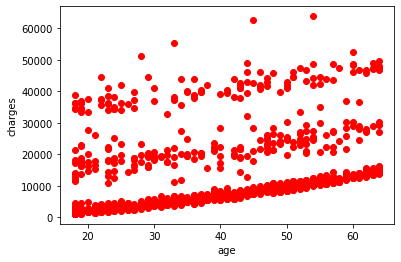

In [10]:
plt.scatter(x_train, y_train, color='red')
plt.xlabel("age")
plt.ylabel("charges")
plt.show()

### Adjusting training split to regression model. Displaying the regression model score.

In [11]:
lm = LinearRegression()
lm.fit(x_train, y_train)
y_predict = lm.predict(x_test)

print(f"Train Accuracy {lm.score(x_train, y_train)}")
print(f"Test Accuracy {lm.score(x_test, y_test)}")

Train Accuracy 0.10512919965622514
Test Accuracy 0.023826712546764717


### Display of the coefficients β0, β1 since the model is written in the form of:
### charges = β0 + β1.age

In [12]:
print(f"intercept: {lm.intercept_}")

print(f"slope: {lm.coef_}")


intercept: 2270.620733394562
slope: [275.89697163]


### Display of the simple linear regression line.


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

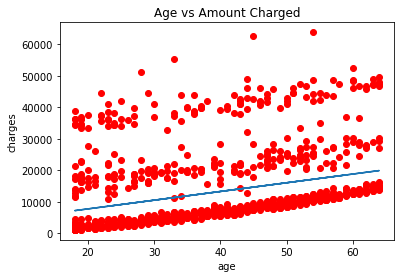

In [13]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_test,y_predict)
plt.xlabel("age")
plt.ylabel("charges")
plt.title("Age vs Amount Charged")
plt.plot

### Regression model findings.

1. There appears to be a slight increase in the cost of insurance over a lifetime.
2. This chart also shows that age is only one factor that goes into determining insurance costs for people due to their distribution.
3. The data seems to be broken down into 3 main levels (0-10000, 10000-25000 and 35000-45000) of loads and I can't figure out why. Something to look for more in the future.

<h1> II. Multiple linear regression model

### Using a multiple linear regression model, we divide the data into training and testing portions.

In [14]:
x = pd.DataFrame(np.c_[insurance["age"],insurance["bmi"],insurance["children"]],columns = ['age','bmi','children'])
y = insurance.charges.values

print("the x variable is:")
print(x)
print('')
print("the y variable is:", y)

the x variable is:
       age     bmi  children
0     19.0  27.900       0.0
1     18.0  33.770       1.0
2     28.0  33.000       3.0
3     33.0  22.705       0.0
4     32.0  28.880       0.0
...    ...     ...       ...
1333  50.0  30.970       3.0
1334  18.0  31.920       0.0
1335  18.0  36.850       0.0
1336  21.0  25.800       0.0
1337  61.0  29.070       0.0

[1338 rows x 3 columns]

the y variable is: [16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=100)
print(f"x_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print("")
print(f"x_test shape {x_test.shape}")
print(f"y_test shape {y_test.shape}")

x_train shape (1070, 3)
y_train shape (1070,)

x_test shape (268, 3)
y_test shape (268,)


### Fitting training split to multiple linear regression model. Displaying the regression model score.

In [16]:
lm = LinearRegression()
lm.fit(x_train, y_train)
y_predict = lm.predict(x_test)

print(f"Train Accuracy {lm.score(x_train, y_train)}")
print(f"Test Accuracy {lm.score(x_test, y_test)}")

Train Accuracy 0.1305274990006685
Test Accuracy 0.07091124032821483


### Display of the coefficients β0, β1, β2, β3 since the model is written in the form of:
### charges = β0 + β1.age + β2.bmi + β3.children

In [17]:
print("β0 : ",lm.intercept_)

print("β1, β2, β3: ",lm.coef_)


β0 :  -6548.302495232461
β1, β2, β3:  [260.38363412 284.60315964 632.02901298]


### Display of the simple linear regression line.


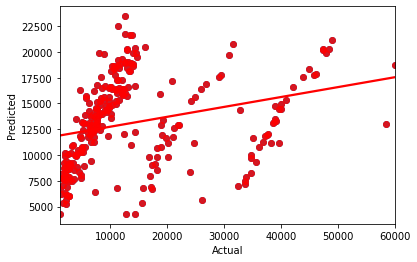

In [18]:
plt.scatter(y_test,y_predict);
plt.xlabel('Actual');
plt.ylabel('Predicted');
sns.regplot(x=y_test,y=y_predict,ci=None,color ='red');


### Findings from the multiple linear regression model.

=> The result obtained with a multiple linear regression model is more precise than that obtained with the simple regression model.